# Notes on Chapter 2

Thsi contains information about numpy arrays that I didn't know. 

## Numpy arrays

Let's import numpy and start using it:

In [1]:
import numpy

Unlike lists Numpy arrays are contrained to have all the elements of the same type.  If the types don't match, Numpy will try to upcast. For example, here integers are upcast to floating points.

In [2]:
numpy.array([3.14, 4, 2, 3])

array([ 3.14,  4.  ,  2.  ,  3.  ])

If we want to set the data type to a specific type, we use the `dtype` keyword:

In [3]:
numpy.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

Numpy array can be multidimensional while lists can't. We can generate multi-dimensional arrays also by passing nested list to numpy array. 

In [4]:
numpy.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Subarrays as no copy views

It's important to know that array slices return a "views" of the array rather than copies (this happen in lists). For example:

In [5]:
x2 = numpy.random.randint(10, size=(3, 4))  # Two-dimensional array
print(x2)

[[1 3 9 9]
 [6 6 5 5]
 [0 4 7 0]]


In [6]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[1 3]
 [6 6]]


Now let's see what happen when we modify the subarray:

In [7]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  3]
 [ 6  6]]


In [8]:
print(x2)

[[99  3  9  9]
 [ 6  6  5  5]
 [ 0  4  7  0]]


As you can see the original array has been modified. If we want to avoid this beahaviour, we need to create copies of the array by using the `copy()` method.

In [9]:
#Create a copy
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  3]
 [ 6  6]]


In [10]:
#Modify the copy of the subarray
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  3]
 [ 6  6]]


In [11]:
#We observe no changes in the original one
print(x2)

[[99  3  9  9]
 [ 6  6  5  5]
 [ 0  4  7  0]]


## Different ways of reshape arrays

In [12]:
#put numbers from 1-9 in a 3x3 matrix
grid = numpy.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [13]:
x = numpy.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [14]:
# row vector via newaxis
x[numpy.newaxis, :]

array([[1, 2, 3]])

In [15]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [16]:
# column vector via newaxis
x[:, numpy.newaxis]

array([[1],
       [2],
       [3]])

## About concatenation of arrays

We will use `numpy.concatenate`, `numpy.vstack`, and `numpy.hstack`. 

In [17]:
x = numpy.array([1, 2, 3])
y = numpy.array([3, 2, 1])

In [18]:
#Concatenate 2 arrays,
#Note: we can concatenate more than 2 at the same time
numpy.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [19]:
#We can also use with 2d arrays
grid = numpy.array([[1, 2, 3],
                 [4, 5, 6]])

numpy.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [20]:
#If we want to concatenate along the sencond axis we do:
numpy.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

If we want to stack array form different dimensions, we can use the stack functions. For example:

In [21]:
x = numpy.array([1, 2, 3])
grid = numpy.array([[9, 8, 7],
                   [6, 5, 4]])

# vertically stack the arrays
numpy.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [22]:
# horizontally stack the arrays
y = numpy.array([[99],
                [99]])
numpy.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

## Splitting of arrays

For documentation on `numpy.split()` got to this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.split.html). 

In [23]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = numpy.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


The [3,5] in the second argument, indicates that the arrays will be splitted as:

* ary[:3]
* ary[3:5]
* ary[5:]

Note that if we have N split-points, we will have N+1 subarrays. Other similar functions are `numpy.hsplit` and `numpy.vsplit`. For example:

In [24]:
#Let's defined a grid that we will split
grid = numpy.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

`vsplit` is equivalent to split with `axis=0` (default), the array is always split along the first axis regardless of the array dimension.

In [25]:
upper, lower = numpy.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


More documentation on `vsplit` can be find in this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.vsplit.html#numpy.vsplit)


`hsplit` is equivalent to split with `axis=1`, the array is always split along the second axis regardless of the array dimension.

In [26]:
left, right = numpy.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


More documentation on `hsplit` can be find in this [link](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.hsplit.html#numpy.hsplit)

## Cool features of numpy ufunc

### Specifying output

Some times is useful to specify the array where we want to store the result of the calculation. We can use this to write results to the memory location where we like them to be, instead of creating a temporary array. This work better for really big arrays, ie it's more efficient for big arrays, otherwise we don't see a speedup. 

In [27]:
x = numpy.random.rand(100000000)

In [28]:
%%timeit
y = x*5

715 ms ± 64.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
z = numpy.zeros(100000000)

In [30]:
%%timeit 
numpy.multiply(x, 5, out=z)

137 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Other example of saving output is:

In [31]:
x = numpy.arange(5)
y = numpy.zeros(10)
numpy.power(2, x, out=y[::2])
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


### Aggregates

For binnary functions, some aggregates can be computed from the object. For example, reducing and array by using the `reduce` method of any `ufunc` ([`numpy.ufunc.reduce`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)). A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

In [32]:
x = numpy.arange(1,6)
numpy.add.reduce(x)

15

In [33]:
numpy.multiply.reduce(x)

120

If we want to store the intermediate steps, we use [`accumulate`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.accumulate.html) instead of `reduce`

In [34]:
numpy.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [35]:
numpy.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

### Outer product

How to generate the output of all pairs of two different inputs. 

In [36]:
numpy.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

**Note**

"The axis keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated." (From the book PDSH)

For example:

In [37]:
M = numpy.random.random((3, 4))
print(M)

[[ 0.37099975  0.80338329  0.05906333  0.59156109]
 [ 0.48774302  0.27922916  0.68010617  0.81081275]
 [ 0.23812814  0.06840676  0.27142479  0.64777259]]


In [38]:
# Find the minimum value within each column by specifying axis=0:
M.min(axis=0)

array([ 0.23812814,  0.06840676,  0.05906333,  0.59156109])

In [39]:
# Find the maximum value within each column by specifying axis=1
M.max(axis=1)

array([ 0.80338329,  0.81081275,  0.64777259])

## Example: usefulness of Numpy aggregates

In this case we will explore some data and we will use some numpy functions to have a better idea of what is going on. The example consists in analyzing the president heights. 

In [40]:
#Let's peak the data and see how it looks
!head -5 ../notebooks/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163


We will use `pandas` now but we will see in the next chapter this library in more detail.  

In [41]:
import pandas
data = pandas.read_csv('../notebooks/data/president_heights.csv')

In [42]:
type(data)

pandas.core.frame.DataFrame

In [43]:
#Uncomment the next line to see how it looks
#data

In [44]:
heights = numpy.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have an array we can compute some things on it, like for example:

In [45]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


If we want to know more about the distribution we can calculate some more info like:

In [46]:
print("25th percentile:   ", numpy.percentile(heights, 25))
print("Median:            ", numpy.median(heights))
print("75th percentile:   ", numpy.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Note: percentil x means that x amount of the values are below and the rest above. For example the for the 25th percentil, we have that 25% of the heights are under 174.25 and the rest are above. The median is the value separating the higher half of a data.

To have a better idea we will plot this data.

In [47]:
from matplotlib import pyplot
import seaborn; seaborn.set() #set plot style
%matplotlib inline

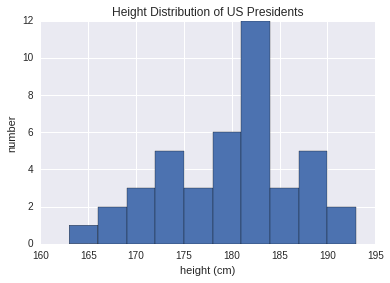

In [48]:
pyplot.hist(heights)
pyplot.title('Height Distribution of US Presidents')
pyplot.xlabel('height (cm)')
pyplot.ylabel('number');

## Broadcasting 

Broadcasting is what allows toto perform binary operations on arrays of different size. We can think of this as an operation that stretches the arrays in a certain way. For example:

In [49]:
a = numpy.array([0, 1, 2])

In [50]:
a + 5

array([5, 6, 7])

As you can see it's like stretch the value 5 into the array `[5, 5, 5]`, and adds the results. The advantage of Numpy is that this duplication doens't actually take place. 

We can extend this to arrays of higher dimension. For example:

In [51]:
M = numpy.ones((3, 3))

In [52]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In the previous case the array `a` was stretched (broadcast) accross the second dimension to match the shape of `M`. However, things get more complicated when we involve broadcasting of both arrays. For example:

In [53]:
a = numpy.arange(3)
b = numpy.arange(3)[:, numpy.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [54]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

We stretched/broadcasted one value to match the shape of the other, in the past case we've stretched `a` and `b` to match a common shape, and as a result is a 2D array. 

## Rules of Broadcasting

Numpy has a strict rules to determine the interaction between two arrays:

1. If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading side (ie the left)

2. If the shape of the two arrays doesn't match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape. 

3. If in any dimension the sizes don't match and none of them is 1, an error is raised. 

Let's see couple of example to make these rules more clear.


### Bradcasting example 1

We will add a 2D array witha 1D array.

In [55]:
M = numpy.ones((2, 3))
a = numpy.arange(3)

Let's inspect the shape first:

In [56]:
print(M.shape)
print(a.shape)

(2, 3)
(3,)


We can se that the array `a` has fewer dimensions, by rule 1 we pad it on the left with ones. 

- `M.shape = (2, 3)`
- `a.shape = (3,)`

By rule 2, we see that the first dimension doesn't match, so we stretch this dimension to match:

- `M.shape -> (2, 3)`
- `a.shape -> (2, 3)`

No the shapes match, and we see that the final shape will be `(2,3)`

In [57]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Broadcasting example 2 

Now we have a case where both arrays need to be broadcast:

In [58]:
a = numpy.arange(3).reshape((3, 1))
b = numpy.arange(3)

In [59]:
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


Let's see the shape:

In [60]:
print(a.shape)
print(b.shape)

(3, 1)
(3,)


Rule 1 says we neet to pad the shape of `b` with ones:

- `a.shape -> (3, 1)`
- `b.shape -> (1, 3)`

Rule two indicates we need to upgrade both ones to match the corresponding size of the array:

- `a.shape -> (3, 3)`
- `b.shape -> (3, 3)`

Since the result matches, the shapes are compatible and we will get a resulting shape of `(3, 3)`.

In [61]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Let's see what happen when two arrays are not compatible:

In [62]:
M = numpy.ones((3, 2))
a = numpy.arange(3)

Comparing with example 1, here `M` is transposed. Let's see how this affects the calculation. 

Because of rule 1:

- `M.shape -> (3, 2)`
- `a.shape -> (1, 3)`

Rule 2 tells us to stretched the dimension of `a` to match that of M:

- `M.shape -> (3, 2)`
- `a.shape -> (3, 3)`

In this case we hit rule 3, final shapes don't match.

In [63]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

We might be thinking in making compatible `M` and `a` by padding a's shape to the right, but those are not the rules of broadcasting. If we want to do  that, we can do it explicitly by reshaping the array. 

In [64]:
a[:, numpy.newaxis].shape

(3, 1)

In [65]:
M + a[:, numpy.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

Note that even though we concentrate on the `+`, these broadcasting rules apply to any binary `ufunc`. For example, the `logaddexp(a, b)` function, which computes `log(exp(a) + exp(b))` with more precision than the naive approach:

In [66]:
numpy.logaddexp(M, a[:, numpy.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

## Broadcasting in real cases

Let's take a look at couple of examples where broadcasting is useful. 

### Centering an array

A common example is when we need to center an array of data. Let's suppose we have an array of 10 observations, and each one has 3 values. We will store this in a $10\times3$ array:

In [67]:
X = numpy.random.random((10, 3))

In [68]:
print(X)

[[ 0.43182142  0.41254037  0.4112931 ]
 [ 0.01621026  0.1977624   0.10339702]
 [ 0.95071836  0.96676597  0.07993611]
 [ 0.34067476  0.95417826  0.79536169]
 [ 0.60818947  0.08852892  0.70986759]
 [ 0.52914545  0.98095742  0.24569702]
 [ 0.8672884   0.1643891   0.54166529]
 [ 0.96552189  0.34194384  0.86228708]
 [ 0.62335622  0.31092635  0.31797703]
 [ 0.09515989  0.87528464  0.15805859]]


We can compute the mean of each feature using the mean aggregate accross the first dimension: 

In [69]:
Xmean = X.mean(0)
Xmean

array([ 0.54280861,  0.52932773,  0.42255405])

Let's center the `X` array by substracting the mean (thisis a broadcasting operation):

In [70]:
X_centered = X - Xmean

In [71]:
print(X_centered)

[[-0.11098719 -0.11678735 -0.01126095]
 [-0.52659835 -0.33156533 -0.31915703]
 [ 0.40790974  0.43743825 -0.34261794]
 [-0.20213385  0.42485053  0.37280763]
 [ 0.06538086 -0.44079881  0.28731354]
 [-0.01366316  0.45162969 -0.17685703]
 [ 0.32447979 -0.36493863  0.11911124]
 [ 0.42271327 -0.18738389  0.43973303]
 [ 0.0805476  -0.21840138 -0.10457702]
 [-0.44764872  0.34595691 -0.26449547]]


If we want to cheack that what we've done is correct, we can check that the centered array has near zero mean.

In [72]:
X_centered.mean(0)

array([  4.44089210e-17,  -7.77156117e-17,  -3.88578059e-17])

### Plotting a 2D function

Let's define a function $z = f(x,y)$, and use broadcasting to compute the function accross the grid. 

In [73]:
#x and y have 50 steps from 0 to 5
x =  numpy.linspace(0, 5, 50)
y =  numpy.linspace(0, 5, 50)[:, numpy.newaxis]

print(x.shape)
print(y.shape)

(50,)
(50, 1)


In [74]:
z = numpy.sin(x)**10 + numpy.cos(10 + y * x) * numpy.cos(x)

In [75]:
print(z.shape)

(50, 50)


In [76]:
#To undo seaborn style and reset to original style.
seaborn.reset_orig()

In [77]:
from matplotlib import pyplot
%matplotlib inline

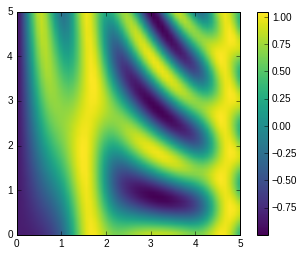

In [78]:
pyplot.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
pyplot.colorbar();

## Using Masks and boolean logic 

In [79]:
rng = numpy.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [80]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

In [81]:
# count values less than zero
numpy.count_nonzero(x < 6)

8

Note that what we are counting are the `nonzero` values in the array resulting from the operation `x < 6`. Therefore the way we count is, `True = 1` and `False = 0`. 

In [82]:
#we can obtain the same result doing
numpy.sum(x < 6)

8

In [83]:
# how many values less than 6 in each row?
numpy.sum(x < 6, axis=1)

array([4, 2, 2])

In [84]:
# how many values less than 6 in each column?
numpy.sum(x < 6, axis=0)

array([2, 2, 2, 2])

In [85]:
# are all values in each row less than 8?
numpy.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

### Using boolean arrays as masks

Using booleans as amsks we can select particular subsets of data. Suppose that we want an array of all the values in an existing array that are less than 5:

In [86]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [87]:
#We can obtain a boolean array for the condition
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

To select these values from the array we can index on the boolean array, what is known as *masking*:

In [88]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What we got is a 1D array filled with the values that meet the condition, ie. all the values in positions at which the mask is `True`.

### keywords and/or Versus the Operators &/|

`and` and `or` gauge the thruth or falsehoo of entire object, while `&` and `|` refer to bits within each object. 

Using `and` and `or` is equivalent to asking Python to treat the object as a single thing. 

In [89]:
bool(42), bool(0)

(True, False)

In [90]:
bool(42 and 0)

False

In [91]:
bool(42 or 0)

True

In [92]:
bin(42)

'0b101010'

In [93]:
bin(59)

'0b111011'

In [94]:
bin(42 & 59)

'0b101010'

In [95]:
bin(42 | 59)

'0b111011'

Note that the corresponding bits of the binary rperesentation are compared in order to get teh result.

We can also have an array of Boolean values in Numpy:

In [96]:
A = numpy.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = numpy.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

If we try to use `and` or `or` we will have an error, because it will try to evaluate the thruth or falsehood of the entire object, and that is not well defined.

In [97]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

If we want to to do a boolean expression on a given array, we should use `|` or `&`:

In [98]:
x = numpy.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

If we try to evaluate the expression on the entire array we will have an error:

In [99]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Note from the book**
"So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation"

## Fancy indexing

Fancy indexing consists in passing an array of indices to access multiple elements at once. For example:

In [100]:
rand = numpy.random.RandomState(42)

x =  rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


If we want to access three different elements, we can do this:

In [101]:
[x[3], x[7], x[2]]

[71, 86, 14]

Or we can pas a list or array of indices and get the same:

In [102]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Notice that when we use fancying indexing, the shape of the result reflects the shape of the index arrays rather than th shape of the array that is being indexed:

In [103]:
ind = numpy.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

We can also do this kind of indexing in multiple dimensions:

In [104]:
X = numpy.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

The first index refers to the row, the second to the column:

In [105]:
row = numpy.array([0, 1, 2])
col = numpy.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

You can notice that the first value is the output of `X[0, 2]`, the second is `X[1, 1]`, and the third is `X[2, 3]`. The pairing of indices in fancy indexing follows the same rules than the Broadcasting rules. For example, if we combine colmun vector and a row vector, we get:

In [106]:
X[row[:, numpy.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here each row value is matched with each column vector.

### Combined Indexing

We can combine the fancy indexing with the other indexing schemes:

In [107]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [108]:
#Combination with simple indices:
X[2, [2, 0, 1]]

array([10,  8,  9])

In the previous example, we grabed from the third row (idx = 2) the elements in third, first and second place.

In [109]:
#Combination with slicing:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [110]:
#Combination with masking:
mask = numpy.array([1, 0, 1, 0], dtype=bool)
X[row[:, numpy.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Notice that the mask indicates to pick 1st and 3rd column. 

## Example: selecting random points

A common use of fancy indexing is the selection of subsets of rows from a matrix. Let's creat an N by D matrix representing N points in D dimensions. For example, the following points drawn from a 2d normal distribution.

In [111]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

We use matplotlib to do a scatter plot and visualize this points. 

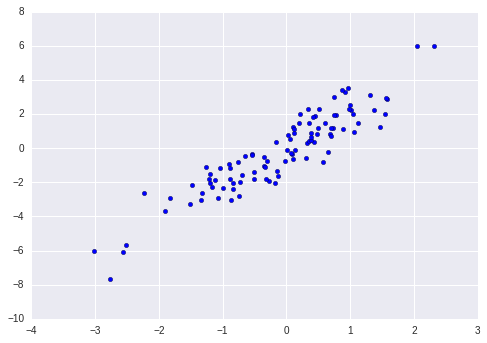

In [112]:
import seaborn
seaborn.set() 

pyplot.scatter(X[:, 0], X[:, 1]);

We can use fancy indexing to select 20 random points. We'll pick 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [113]:
indices = numpy.random.choice(X.shape[0], 20, replace=False)
indices

array([26, 63, 49, 42, 51, 29, 57, 83, 20, 11, 95,  8, 27, 36, 33,  5, 34,
       44, 54, 79])

In [114]:
selection = X[indices]
selection.shape

(20, 2)

Now let's check wich points were selected, let's over-plot large circles at the location of the selected points. 

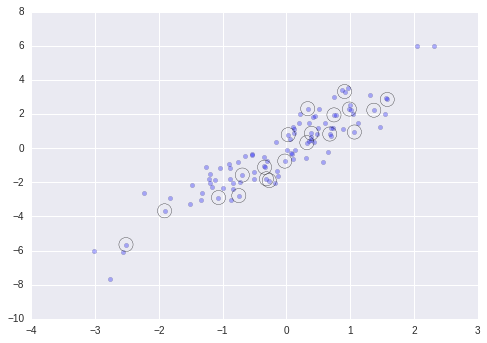

In [115]:
pyplot.scatter(X[:, 0], X[:, 1], alpha=0.3)
pyplot.scatter(selection[:, 0], selection[:, 1],
               facecolor='none', s=200);


This kind of startegy is useful to partition datasets, as is often needed in train/test splitting for validation of statistical models.

### Fancy indexing to modify values

We saw we can use fancy indexing to access parts of an array, we can also modify those parts. For example:

In [116]:
x = numpy.arange(10)
i = numpy.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can also use any assignment-type operator. 

In [117]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice that repeated indices with these operations can cause unexpetcted results. For example:

In [118]:
x = numpy.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


What happen with the 4 here? The first operation assign `x[0] = 4`, followed by `x[0] = 6`. The result of course is that `x[0]` contains 6.

Now let's consider the following case:

In [119]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

We were expecting that `x[3]` would contain the value 2, and `x[4]` the value 3, as this is how many times each index is repeated. What is going on? 

Conceptually, `x[i] += 1` is a shorthand of `x[i] = x[i] + 1`. `x[i] + 1` is evaluated and then the result is asigned to the indices in `x`. What this in mind, it's not the aumentation what happens multiple times, but the assignment, which ends up in a nonintuitive result.

To have the result we were expection, we can use the `at()` method of ufuncs and do:

In [120]:
x = numpy.zeros(10)
numpy.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


The `at()` method does an in-place application of the given operator at the specified indices (here, i) with the specific value (here, 1). 

## Example: Binning Data

We can use this idea to create a histogram by hand. For example, we have 1000 values and we would like to know where they fall within an array of bins. 

In [121]:
numpy.random.seed(42)
x = numpy.random.randn(100)

# compute a histogram by hand.
bins = numpy.linspace(-5, 5, 20)

Now we will use `numpy.searchsorted` to find the appropriate bin for each x. This ufunc finds indices where elements should be inserted to maintain order. Read documentation [here](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.searchsorted.html)

In [122]:
# find the appropriate bin for each x.
i = numpy.searchsorted(bins, x)

# initialize the array where we will be counting.
counts = numpy.zeros_like(bins)

In [123]:
print(i)

[11 10 11 13 10 10 13 11  9 11  9  9 10  6  7  9  8 11  8  7 13 10 10  7  9
 10  8 11  9  9  9 14 10  8 12  8 10  6  7 10 11 10 10  9  7  9  9 12 11  7
 11  9  9 11 12 12  8  9 11 12  9 10  8  8 12 13 10 12 11  9 11 13 10 13  5
 12 10  9 10  6 10 11 13  9  8  9 12 11  9 11 10 12  9  9  9  7 11 10 10 10]


In [124]:
#Now we add 1 of eahc of the bins when it hits index.
numpy.add.at(counts, i, 1)

The counts now reflects the number of points within each bin. 

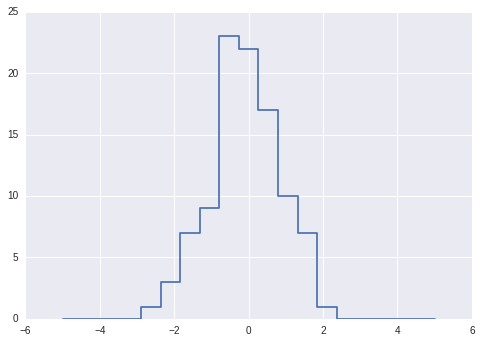

In [125]:
# plot the results
pyplot.plot(bins, counts, linestyle='steps');

But, guess what, ython already have a function that does this for us. This way we don't need to do the steps above every time. We can just use:

```python
pyplot.hist(x, bins, histtype='step');
```
Let's compare timing

In [126]:
print("NumPy routine:")
%timeit counts, edges = numpy.histogram(x, bins)

print("Custom routine:")
%timeit numpy.add.at(counts, numpy.searchsorted(bins, x), 1)

NumPy routine:
133 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
24.7 µs ± 3.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Uhm? it looks like the non-numpy routine is faster, let's push it a little bit by trying a bigger problem and see what happen:

In [127]:
x = numpy.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = numpy.histogram(x, bins)

print("Custom routine:")
%timeit numpy.add.at(counts, numpy.searchsorted(bins, x), 1)

NumPy routine:
87.8 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
173 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


There we go!. As you can see what's the best option depends on the size of the problem, and on the problem itself. "The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like np.histogram and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior." (took form the book)

## Sorting arrays

Let's explore some sorting options.

### Simple selection sort

The following snipet is a simple selection sort that repeatedly finds the minimum value from a list, and makes a swap until de list is sorted. 

In [128]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + numpy.argmin(x[i:]) #argmin Returns the indices of the minimum values along an axis.
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [129]:
x = numpy.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

This is a $\mathcal{O}[N^2]$ algorithm. For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value. Even though $N^2$ is not good, it is better than the *bogsort*

### Bogsort

This is a silly method that relies on chance, it applies a random shuffle until the array it's order. An avaerage scaling for this algorithm is $\mathcal{O}[N \times N!]$. So yeah, don't use it!

In [130]:
def bogsort(x):
    while numpy.any(x[:-1] > x[1:]):
        numpy.random.shuffle(x)
    return x    

In [131]:
x = numpy.array([2, 1, 4, 3, 5])
bogsort(x)

array([1, 2, 3, 4, 5])

### Numpy sorting: sort and argsort. 

We can use numpy arrays sort functions, this are more efficient than the standard sort and sorted onces that we use in lists. By default `numpy.sort` uses an  $\mathcal{O}[N\log N]$, *quicksort* algorithm, *mergesort* and *heapsort* are available too. For most applications, the default is enough. 

In [132]:
x = numpy.array([2, 1, 4, 3, 5])
numpy.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in place , you can use the sort method of arrays. 

In [133]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is `argsort`, which returns the indices of the sorted elements:

In [134]:
x = numpy.array([2, 1, 4, 3, 5])
i = numpy.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [135]:
x[i]

array([1, 2, 3, 4, 5])

In [136]:
x

array([2, 1, 4, 3, 5])

### Sorting along columns or rows

In [137]:
rand = numpy.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [138]:
#sort each column
numpy.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [139]:
#sort each row
numpy.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Note that this operation treats each row/column as an indepenent array, and any relationship between the row or column will be lost.

### Partial sorts: partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. [`numpy.partition`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.partition.html)  "Creates a copy of the array with its elements rearranged in such a way that the value of the element in k-th position is in the position it would be in a sorted array. All elements smaller than the k-th element are moved before this element and all equal or greater are moved behind it. The ordering of the elements in the two partitions is undefined." (from documentation)

In [140]:
x = numpy.array([7, 2, 3, 1, 6, 5, 4])
numpy.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.

Let's see how we can partition along an arbitrary axis of a multidimensional array:

In [141]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [142]:
numpy.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

### Example K-nearest neighbours

Let's explore how we can use `argsort` along multiple axes to find the nearest neighbours of each point in a set. Let's create a set of 10 points ona a 2D plane. We'll arange these in a `10x2` array

In [143]:
X =rand.rand(10, 2)
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

Let's do a scatter plot to see how these points are distributed:

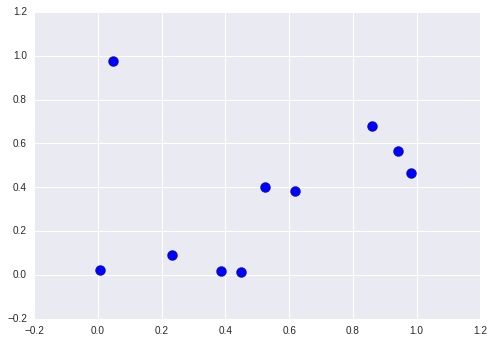

In [144]:
pyplot.scatter(X[:, 0], X[:, 1], s=100);

Let's compute the distance between each pair of points. Remember that the squared-distance a pair of points is the sum of the squared differences in each dimension; using broadcasting and aggregation routines from Numpy we can compute the matrix of square distances:

In [145]:
dist_sq = numpy.sum((X[:, numpy.newaxis, :] - X[numpy.newaxis, :, :])**2, axis=-1)

In [146]:
dist_sq.shape

(10, 10)

We might be confused by this type of operation because it has a lot packed into it.Let's break it down into steps:

In [147]:
print(X[:, :])

[[ 0.00706631  0.02306243]
 [ 0.52477466  0.39986097]
 [ 0.04666566  0.97375552]
 [ 0.23277134  0.09060643]
 [ 0.61838601  0.38246199]
 [ 0.98323089  0.46676289]
 [ 0.85994041  0.68030754]
 [ 0.45049925  0.01326496]
 [ 0.94220176  0.56328822]
 [ 0.3854165   0.01596625]]


In [148]:
print(X[:, numpy.newaxis, :])
print(X[:, numpy.newaxis, :].shape)

[[[ 0.00706631  0.02306243]]

 [[ 0.52477466  0.39986097]]

 [[ 0.04666566  0.97375552]]

 [[ 0.23277134  0.09060643]]

 [[ 0.61838601  0.38246199]]

 [[ 0.98323089  0.46676289]]

 [[ 0.85994041  0.68030754]]

 [[ 0.45049925  0.01326496]]

 [[ 0.94220176  0.56328822]]

 [[ 0.3854165   0.01596625]]]
(10, 1, 2)


In [149]:
print(X[numpy.newaxis, :, :])
print(X[numpy.newaxis, :, :].shape)

[[[ 0.00706631  0.02306243]
  [ 0.52477466  0.39986097]
  [ 0.04666566  0.97375552]
  [ 0.23277134  0.09060643]
  [ 0.61838601  0.38246199]
  [ 0.98323089  0.46676289]
  [ 0.85994041  0.68030754]
  [ 0.45049925  0.01326496]
  [ 0.94220176  0.56328822]
  [ 0.3854165   0.01596625]]]
(1, 10, 2)


In [150]:
# for each pair of points, compute differences in their coordinates
differences = X[:, numpy.newaxis, :] - X[numpy.newaxis, :, :]
differences.shape

(10, 10, 2)

In [151]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [152]:
#print(sq_differences)

In [153]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
#print(dist_sq)
dist_sq.shape

(10, 10)

To double check we can see the values at the diagonal of the matrix. This value is the distance with a point an it self. Therefore it should be zero.

In [154]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

With the pairwise square_distance, we can now use `numpy.argsort` to sort along each row. The left most columns will give us the indices of the nearest neighbours:

In [155]:
nearest = numpy.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


As you can see, in the first column we have the indices go from 0 to 9 because the nearest neighbour to a point is itself. We are doing more work than we need. If we want the nearest `k` neighbours, we just need to partition each row that the smallest `k + 1` squared distances come first, with larger distances filling the remaining positions of the array. Let's use `numpy.argpartition`:

In [156]:
K = 2 #we want the first 2 nearest neighbours
nearest_partition = numpy.argpartition(dist_sq, K + 1, axis=1)

In `numpy.argpartition` the k-th element (K+1  in our example) will be in its final sorted position and all smaller elements will be moved before it and all larger elements behind it.

In [157]:
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

Let's plot the points along with lines representing the connections from each point to its two points nearest neighbors:

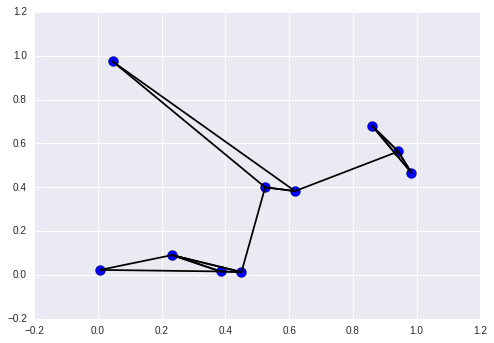

In [158]:
pyplot.scatter(X[:, 0], X[:, 1], s=100)

#draw lines from point to its 2 nearest neighbors
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:

        pyplot.plot(*zip(X[j], X[i]), color='black')

*(notes from the book:)*
Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).